In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import pytz
from datetime import datetime

In [24]:
# 加载数据
user_data = pd.read_csv(r'C:\Users\asus\Desktop\users_combined_info_500.csv')
unique_df = user_data.drop_duplicates(subset=['user_id'])
# 查看前几行以了解数据结构
print(unique_df.head())

       user_id           name                   location  total_influence  \
0       663432         bdraco                Houston, TX      1776.967163   
10764  2892853         Koenkk   The Netherlands, Helmond      1674.805908   
14641   116184         fabaff                Switzerland      1590.152954   
19386  1309177  charliermarsh               Brooklyn, NY      1580.198242   
24880   195327         frenck  Enschede, The Netherlands      1520.352173   

             country   event_type event_action                 event_time  
0      United States  CreateEvent        added  2024-11-26 20:28:37+08:00  
10764    Netherlands  CreateEvent        added  2024-11-27 19:40:17+08:00  
14641    Switzerland  CreateEvent        added  2024-11-29 09:45:07+08:00  
19386  United States  CreateEvent        added  2024-11-27 21:39:44+08:00  
24880    Netherlands  CreateEvent        added  2024-11-27 08:19:45+08:00  


In [25]:
# 统计各个国家的用户数量
country_distribution = unique_df['country'].value_counts()

# 打印前10个国家及其对应的开发者数量
print(country_distribution)

country
United States           122
Germany                  59
China                    34
France                   24
Canada                   24
United Kingdom           21
Netherlands              18
Australia                15
Switzerland              14
Japan                    13
Italy                    10
Poland                   10
New Zealand               7
Spain                     7
Austria                   6
Czechia                   6
Denmark                   5
Sweden                    5
Finland                   4
Belgium                   4
Singapore                 4
Hungary                   4
Russia                    3
India                     3
Bulgaria                  3
Brazil                    3
Taiwan                    2
Malaysia                  2
Norway                    2
Portugal                  2
Hong Kong                 2
Pakistan                  2
Indonesia                 2
United Arab Emirates      2
Egypt                     1
South Korea 

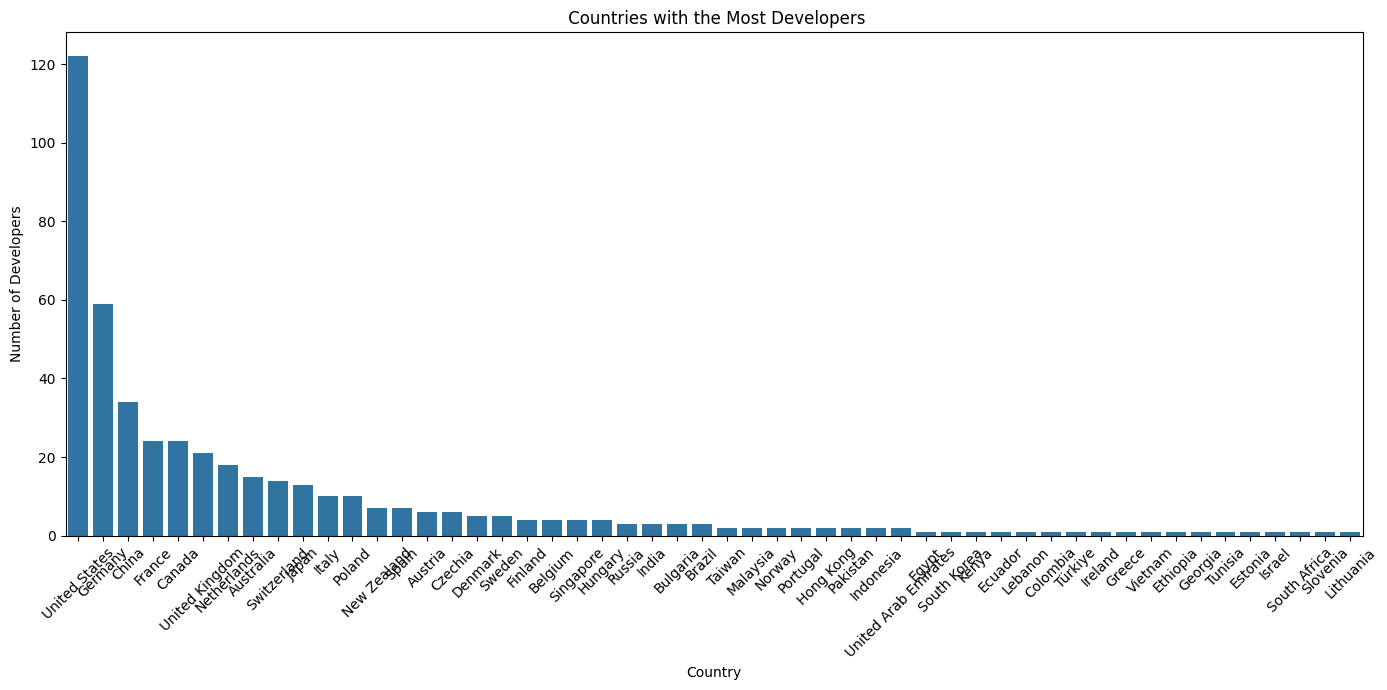

In [26]:
plt.figure(figsize=(14,7))

# 使用seaborn绘制条形图
sns.barplot(x=country_distribution.index, y=country_distribution.values)

# 设置图表标题和标签
plt.title(' Countries with the Most Developers')
plt.xlabel('Country')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 自动调整子图参数以填充整个图形区域

# 显示图表
plt.show()

location
Germany                      23
San Francisco                 7
Berlin, Germany               7
Switzerland                   6
Japan                         6
                             ..
Europe                        1
Rome, Italy                   1
Solar system                  1
0.0.0.0                       1
Waterloo, Ontario, Canada     1
Name: count, Length: 342, dtype: int64


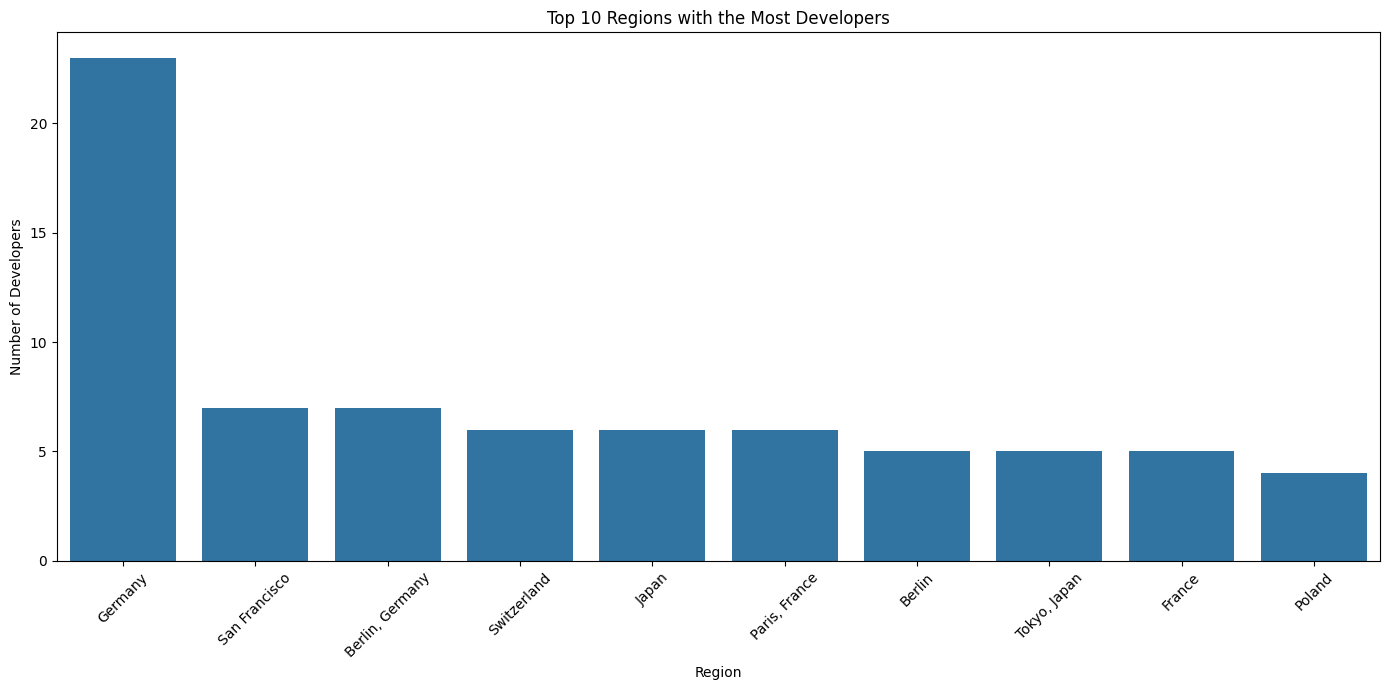

In [27]:
if 'location' in unique_df.columns:
    region_distribution = unique_df['location'].value_counts()
    print(region_distribution)
    
    plt.figure(figsize=(14,7))
    sns.barplot(x=region_distribution.index[:10], y=region_distribution.values[:10])
    plt.title('Top 10 Regions with the Most Developers')
    plt.xlabel('Region')
    plt.ylabel('Number of Developers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [28]:
import pandas as pd
import re


# 从 location 列提取城市信息（假设 location 格式为 "城市, 州/省, 国家" 或类似可提取的格式）
def extract_city(location):
    parts = re.split(', |/', location)
    return parts[0].strip()

unique_df['city'] = unique_df['location'].apply(extract_city)

# 处理可能存在的空值或不规范城市名
data = unique_df.dropna(subset=['city'])
unique_df['city'] = unique_df['city'].apply(lambda x: 'Unknown' if x == '' else x)

C:\Users\asus\AppData\Local\Temp\ipykernel_19356\2323669737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['city'] = unique_df['location'].apply(extract_city)
C:\Users\asus\AppData\Local\Temp\ipykernel_19356\2323669737.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['city'] = unique_df['city'].apply(lambda x: 'Unknown' if x == '' else x)


In [29]:
print(unique_df['city'])

0                  Houston
10764      The Netherlands
14641          Switzerland
19386             Brooklyn
24880             Enschede
                ...       
1286497             Québec
1287934      United States
1289639                Ulm
1291713    The Netherlands
1293176              Lille
Name: city, Length: 497, dtype: object


city
Germany          25
Berlin           12
San Francisco    11
London            9
Paris             8
                 ..
Turku             1
South korea       1
Pessac            1
Taiwan            1
Scotland          1
Name: count, Length: 289, dtype: int64


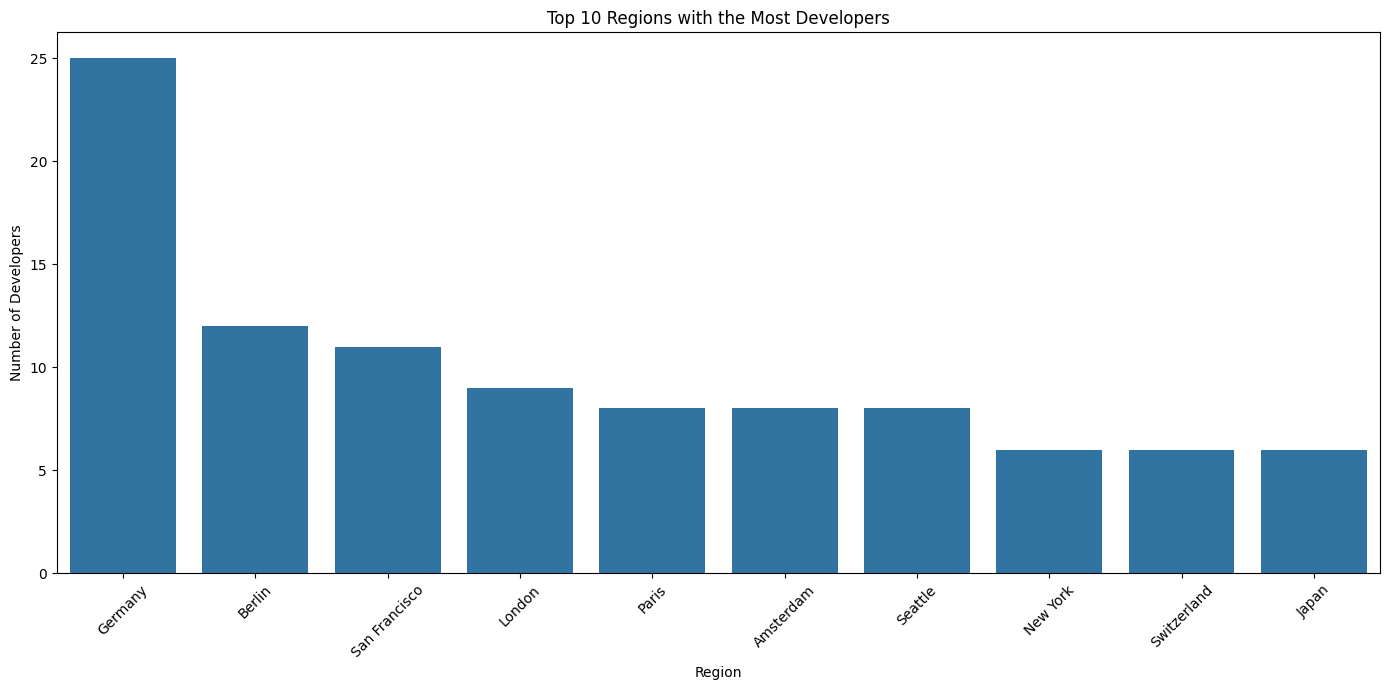

In [30]:
if 'city' in unique_df.columns:
    region_distribution = unique_df['city'].value_counts()
    print(region_distribution)
    
    plt.figure(figsize=(14,7))
    sns.barplot(x=region_distribution.index[:10], y=region_distribution.values[:10])
    plt.title('Top 10 Regions with the Most Developers')
    plt.xlabel('Region')
    plt.ylabel('Number of Developers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [31]:
# 统计每个城市的用户数量
city_user_counts = unique_df['city'].value_counts()

# 计算开发者密度（假设总用户数为 data 的行数）
total_users = len(unique_df)
city_density = city_user_counts / total_users

# 将密度信息添加到数据中
city_density_df = pd.DataFrame({'city': city_density.index, 'density': city_density.values})

             city   density
0         Germany  0.050302
1          Berlin  0.024145
2   San Francisco  0.022133
3          London  0.018109
4           Paris  0.016097
5       Amsterdam  0.016097
6         Seattle  0.016097
7        New York  0.012072
8     Switzerland  0.012072
9           Japan  0.012072
10        Beijing  0.012072
11         France  0.010060
12       Shanghai  0.010060
13          Tokyo  0.010060
14         Zurich  0.010060


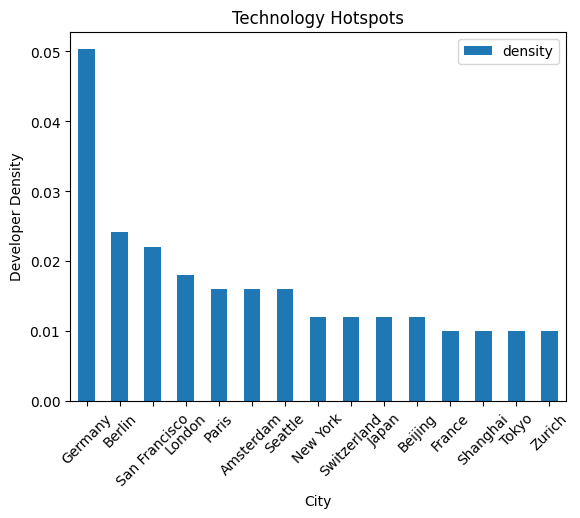

In [32]:
# 设定一个密度阈值来筛选技术热点区域（可根据实际情况调整）
threshold = 0.01  # 示例阈值

hotspots = city_density_df[city_density_df['density'] > threshold]

# 输出热点区域城市及密度信息
print(hotspots)

# 可进一步可视化热点区域分布，例如绘制地图（如果有地理坐标信息）或柱状图
import matplotlib.pyplot as plt

hotspots.plot(kind='bar', x='city', y='density')
plt.xlabel('City')
plt.ylabel('Developer Density')
plt.title('Technology Hotspots')
plt.xticks(rotation=45)
plt.show()

In [33]:
import pandas as pd
import pycountry
from pytz import country_timezones, timezone

# 步骤2：定义辅助函数
def country_name_to_code(country_name):
    """
    将国家名称转换为 ISO 3166-1 alpha-2 国家代码。
    
    参数:
    country_name (str): 国家的全名
    
    返回:
    str 或 None: 如果找到，则返回国家代码；否则返回 None。
    """
    try:
        country = pycountry.countries.lookup(country_name)
        return country.alpha_2
    except LookupError:
        #print(f"未找到国家 '{country_name}' 的代码")
        return None

def get_main_timezone_by_country_code(country_code):
    """
    根据国家代码返回该国的主要时区。
    
    参数:
    country_code (str): 国家的 ISO 3166-1 alpha-2 代码
    
    返回:
    str 或 None: 如果找到，则返回主要时区；否则返回 None。
    """
    if country_code:
        timezones = country_timezones.get(country_code.upper())
        if timezones:
            return timezones[0]  # 对于多时区国家，返回第一个时区作为“主要”时区
        else:
            #print(f"未找到 {country_code} 的时区信息")
            return None
    return None
df =unique_df['country']
# 步骤3：应用辅助函数，添加新的列
unique_df['country_code'] = df.apply(country_name_to_code)
unique_df['main_timezone'] = unique_df['country_code'].apply(get_main_timezone_by_country_code)
#print(unique_df['country_code'])
print("\n处理后的数据:")
print(unique_df[['country', 'country_code', 'main_timezone']])


处理后的数据:
               country country_code     main_timezone
0        United States           US  America/New_York
10764      Netherlands           NL  Europe/Amsterdam
14641      Switzerland           CH     Europe/Zurich
19386    United States           US  America/New_York
24880      Netherlands           NL  Europe/Amsterdam
...                ...          ...               ...
1286497         Canada           CA  America/St_Johns
1287934  United States           US  America/New_York
1289639        Germany           DE     Europe/Berlin
1291713    Netherlands           NL  Europe/Amsterdam
1293176         France           FR      Europe/Paris

[497 rows x 3 columns]


C:\Users\asus\AppData\Local\Temp\ipykernel_19356\1570280975.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['country_code'] = df.apply(country_name_to_code)
C:\Users\asus\AppData\Local\Temp\ipykernel_19356\1570280975.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['main_timezone'] = unique_df['country_code'].apply(get_main_timezone_by_country_code)


In [34]:
# 统计每个时区的数量
timezone_distribution = unique_df['main_timezone'].value_counts().reset_index()
timezone_distribution.columns = ['main_timezone', 'count']

print("时区分布:")
print(timezone_distribution)

时区分布:
          main_timezone  count
0      America/New_York    122
1         Europe/Berlin     59
2         Asia/Shanghai     34
3          Europe/Paris     24
4      America/St_Johns     24
5         Europe/London     21
6      Europe/Amsterdam     18
7   Australia/Lord_Howe     15
8         Europe/Zurich     14
9            Asia/Tokyo     13
10          Europe/Rome     10
11        Europe/Warsaw     10
12     Pacific/Auckland      7
13        Europe/Madrid      7
14        Europe/Prague      6
15        Europe/Vienna      6
16    Europe/Copenhagen      5
17     Europe/Stockholm      5
18      Europe/Helsinki      4
19      Europe/Budapest      4
20      Europe/Brussels      4
21       Asia/Singapore      4
22      America/Noronha      3
23         Europe/Sofia      3
24         Asia/Kolkata      3
25          Asia/Taipei      2
26    Asia/Kuala_Lumpur      2
27         Asia/Karachi      2
28          Europe/Oslo      2
29       Asia/Hong_Kong      2
30           Asia/Dubai      2
31

main_timezone
America/New_York       122
Europe/Berlin           59
Asia/Shanghai           34
Europe/Paris            24
America/St_Johns        24
Europe/London           21
Europe/Amsterdam        18
Australia/Lord_Howe     15
Europe/Zurich           14
Asia/Tokyo              13
Europe/Rome             10
Europe/Warsaw           10
Pacific/Auckland         7
Europe/Madrid            7
Europe/Prague            6
Europe/Vienna            6
Europe/Copenhagen        5
Europe/Stockholm         5
Europe/Helsinki          4
Europe/Budapest          4
Europe/Brussels          4
Asia/Singapore           4
America/Noronha          3
Europe/Sofia             3
Asia/Kolkata             3
Asia/Taipei              2
Asia/Kuala_Lumpur        2
Asia/Karachi             2
Europe/Oslo              2
Asia/Hong_Kong           2
Asia/Dubai               2
Europe/Lisbon            2
Asia/Jakarta             2
Africa/Cairo             1
Asia/Seoul               1
America/Guayaquil        1
America/Bogota

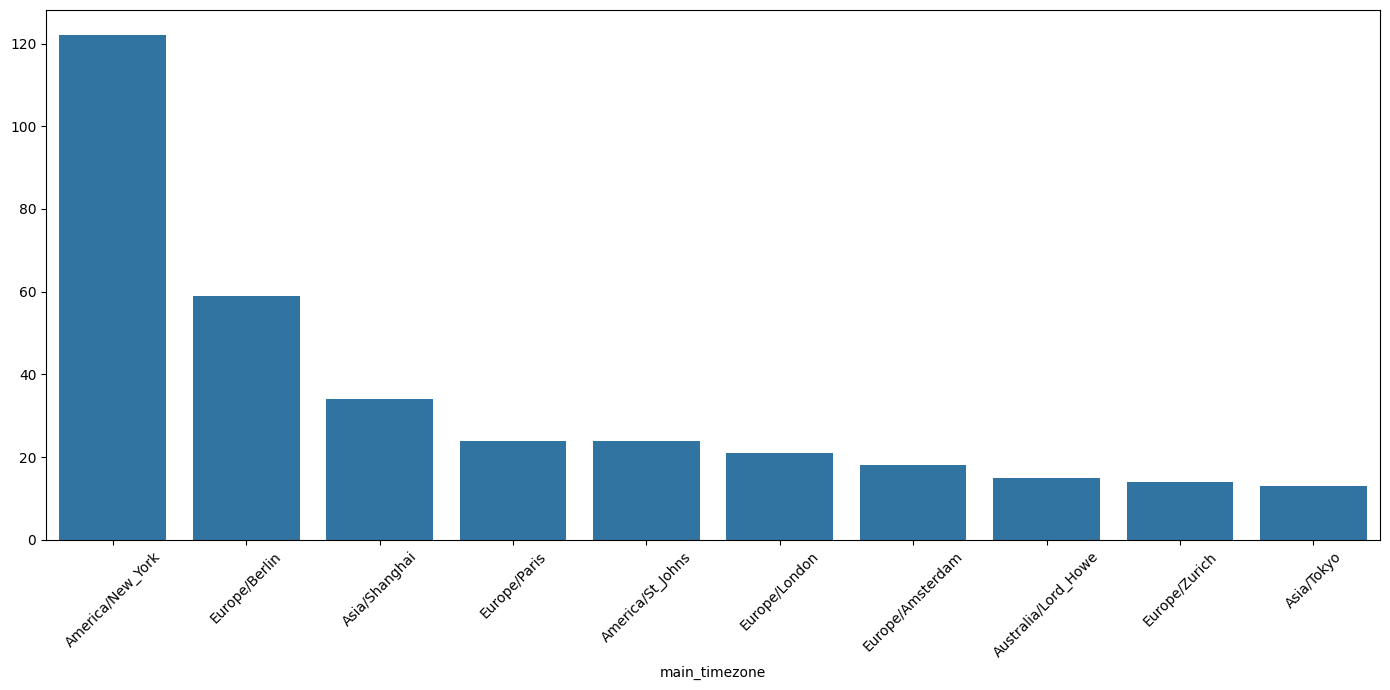

In [47]:
if 'main_timezone' in unique_df.columns:
    region_distribution = unique_df['main_timezone'].value_counts()
    print(region_distribution)
    
    plt.figure(figsize=(14,7))
    sns.barplot(x=region_distribution.index[:10], y=region_distribution.values[:10])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [36]:
submission = user_data['user_id'].value_counts()

# 打印前10个国家及其对应的开发者数量
print(submission.head(10))

user_id
158862      37960
11146458    36400
28706372    30616
1580956     20300
40306929    19215
43724913    14505
9824526     12905
50149701    12704
195327      11218
663432      10764
Name: count, dtype: int64


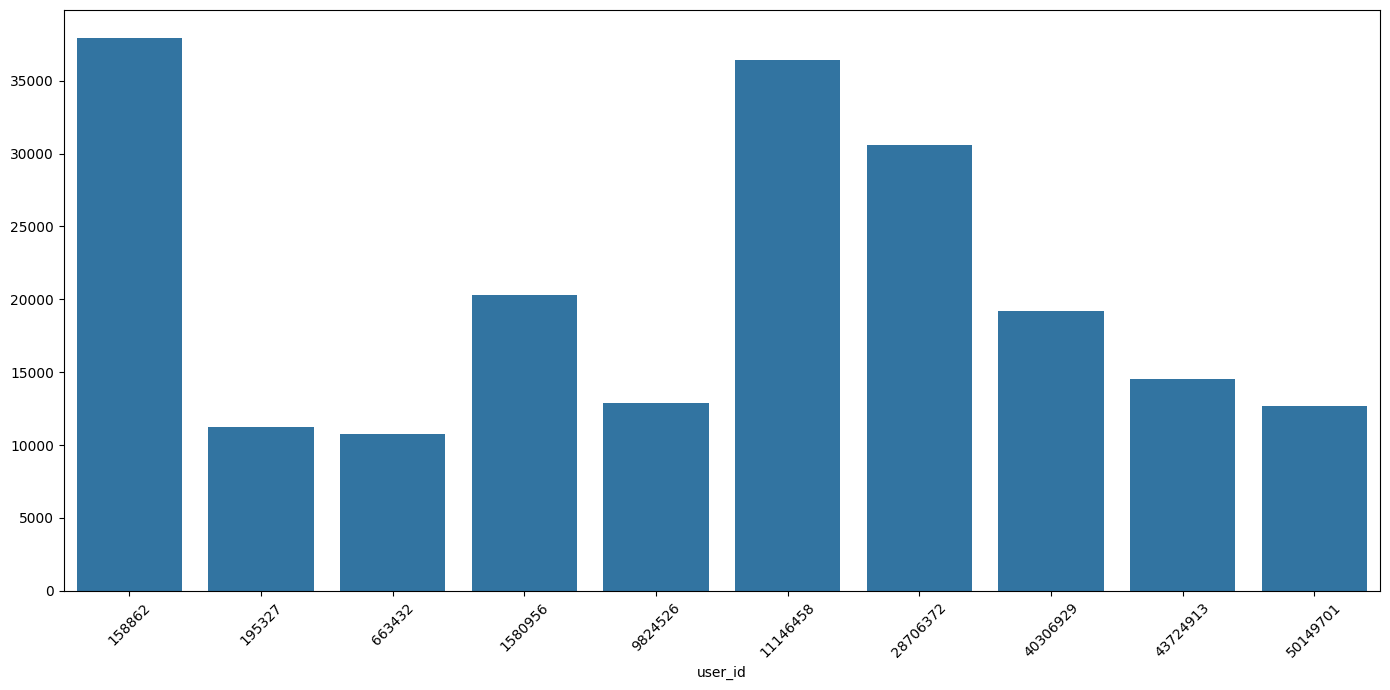

In [46]:
plt.figure(figsize=(14,7))

# 使用seaborn绘制条形图
sns.barplot(x=submission.index[:10], y=submission.values[:10])

# 设置图表标题和标签

plt.xticks(rotation=45)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 自动调整子图参数以填充整个图形区域

# 显示图表
plt.show()

In [38]:
import numpy as np

# 计算第90百分位数和第10百分位数以区分高活跃和低活跃用户
high_threshold = np.percentile(submission.values, 90)
low_threshold = np.percentile(submission.values, 10)

high_active_users = submission[ submission.values>= high_threshold]
low_active_users = submission[submission.values <= low_threshold]
print("\n高活跃用户 (>= 第90百分位):")
print(high_active_users)

print("\n低活跃用户 (<= 第10百分位):")
print(low_active_users)


高活跃用户 (>= 第90百分位):
user_id
158862      37960
11146458    36400
28706372    30616
1580956     20300
40306929    19215
43724913    14505
9824526     12905
50149701    12704
195327      11218
663432      10764
20182680     9137
138339       8534
46537034     8401
8188402      8346
19890894     6599
7258858      6249
7083755      6209
15247171     6152
4399574      5598
122666       5505
1309177      5494
1439341      5252
490673       5231
2119212      5206
282080       5126
8086956      4974
985347       4966
12611259     4896
1814174      4856
140370       4754
116184       4745
26833433     4690
18066964     4625
7237365      4624
81981        4513
27350        4509
477956       4494
7905502      4421
30802565     4375
864788       4373
48202465     4322
4115580      4301
6270921      4230
91018726     4098
13323303     4074
2586601      4019
453543       4018
33058747     3941
24528715     3929
12560461     3898
Name: count, dtype: int64

低活跃用户 (<= 第10百分位):
user_id
26377630    1090
1

In [39]:
import pandas as pd
from datetime import datetime, timedelta
time = user_data['event_time'].value_counts()

print(time.head(100))

event_time
2024-10-30 02:12:11+08:00    73
2024-11-03 09:07:20+08:00    72
2024-11-14 00:25:57+08:00    71
2024-10-10 16:12:24+08:00    64
2024-10-23 19:15:49+08:00    64
                             ..
2024-10-16 11:36:58+08:00    36
2024-11-15 12:11:08+08:00    36
2024-10-27 13:33:13+08:00    36
2024-11-30 07:04:40+08:00    36
2024-11-20 04:38:16+08:00    36
Name: count, Length: 100, dtype: int64


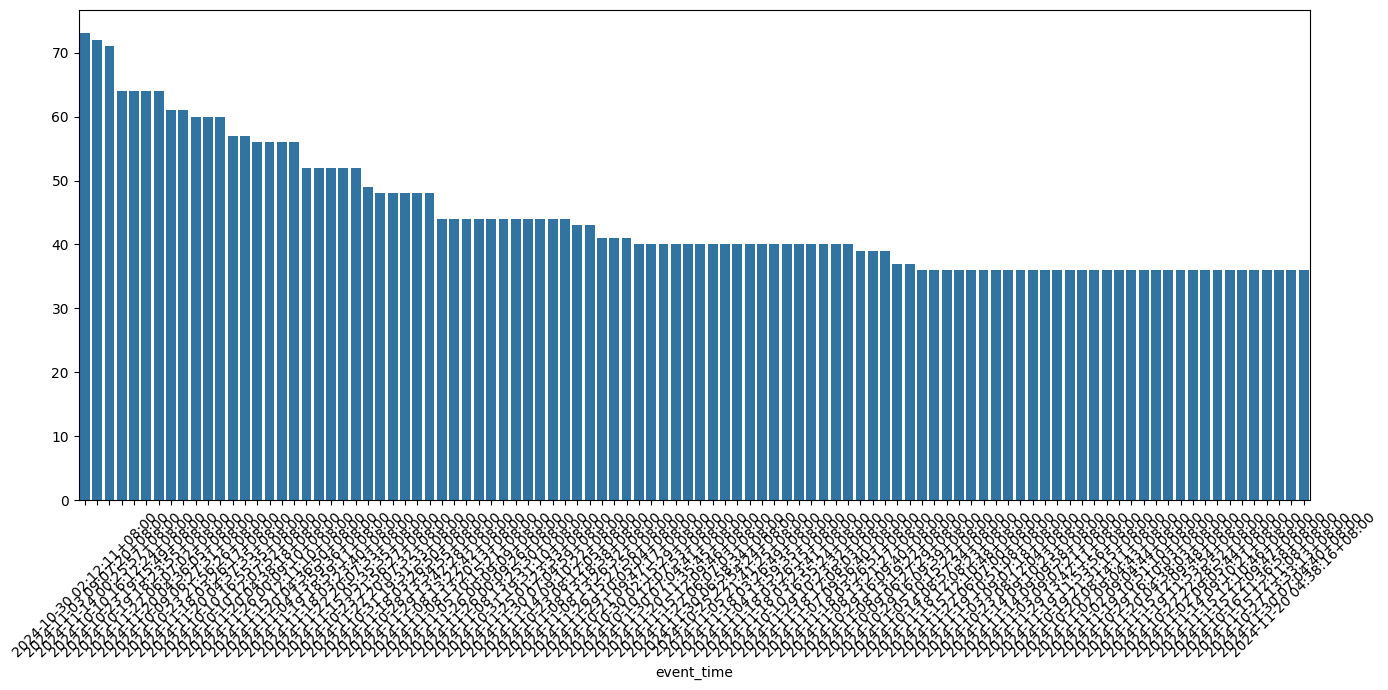

In [45]:
plt.figure(figsize=(14,7))

# 使用seaborn绘制条形图
sns.barplot(x=time.index[:100], y=time.values[:100])

# 设置图表标题和标签
plt.xticks(rotation=45)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 自动调整子图参数以填充整个图形区域

# 显示图表
plt.show()

In [41]:
type = user_data['event_type'].value_counts()

print(type)

event_type
PushEvent                        410955
PullRequestEvent                 201128
IssueCommentEvent                174806
PullRequestReviewEvent           151843
CreateEvent                      104371
DeleteEvent                       96999
PullRequestReviewCommentEvent     86198
IssuesEvent                       51205
ReleaseEvent                       9455
WatchEvent                         3809
ForkEvent                          2175
CommitCommentEvent                  704
GollumEvent                         683
MemberEvent                         390
PublicEvent                          55
Name: count, dtype: int64


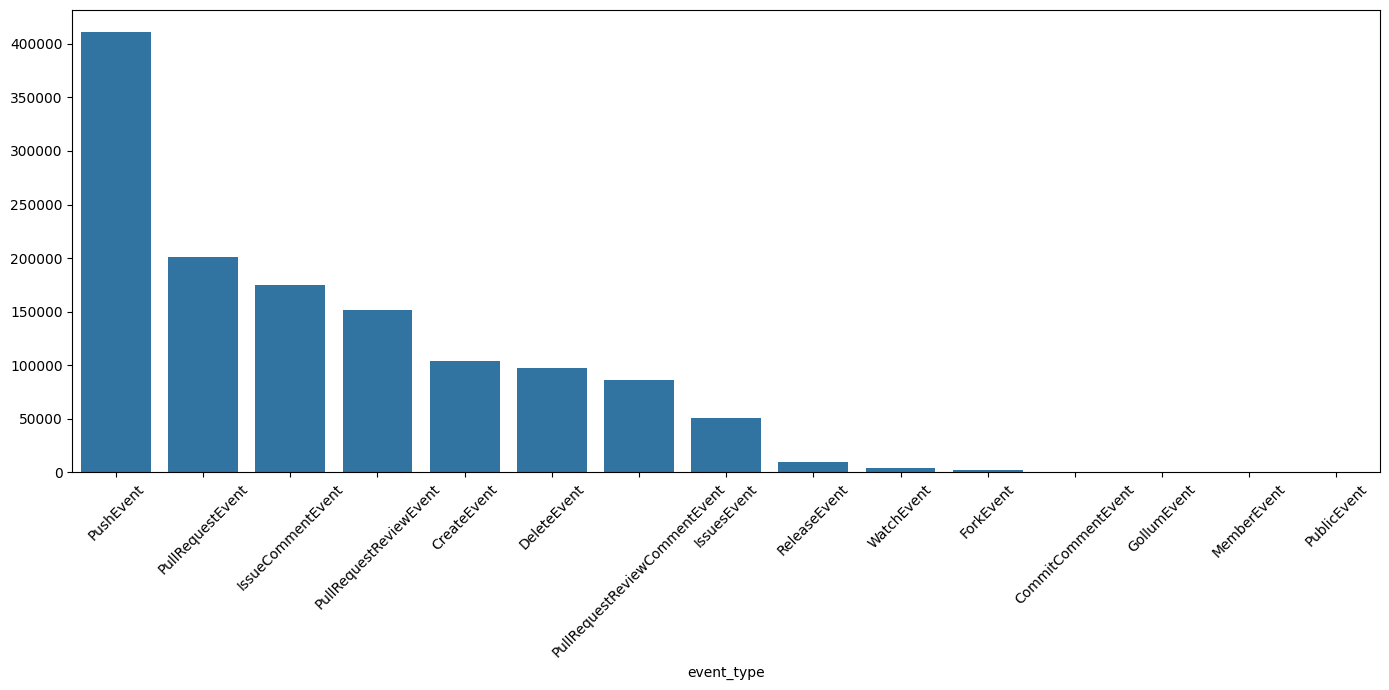

In [44]:
plt.figure(figsize=(14,7))

# 使用seaborn绘制条形图
sns.barplot(x=type.index, y=type.values)

# 设置图表标题和标签

plt.xticks(rotation=45)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 自动调整子图参数以填充整个图形区域

# 显示图表
plt.show()

In [48]:
action=user_data['event_action'].value_counts()
print(action)

event_action
added        617218
created      411961
closed       173489
opened        76406
published      9455
started        3809
reopened       2438
Name: count, dtype: int64


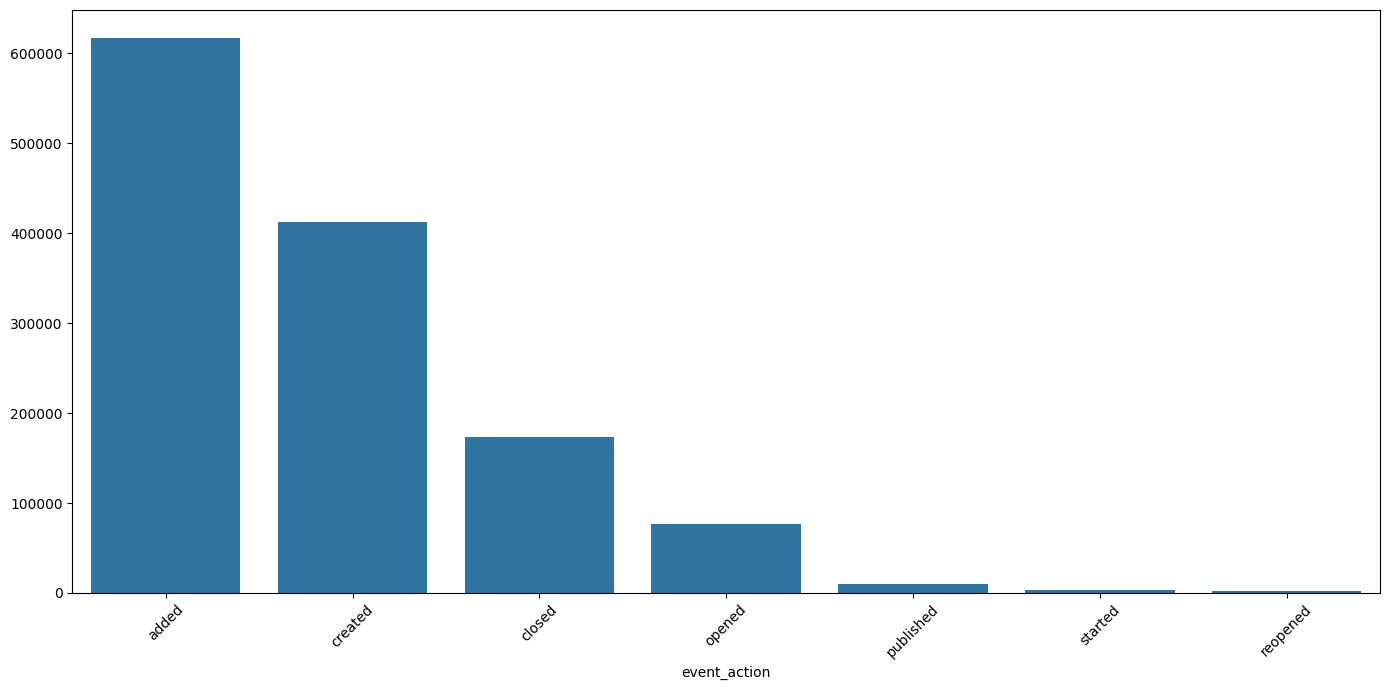

In [49]:
plt.figure(figsize=(14,7))

# 使用seaborn绘制条形图
sns.barplot(x=action.index, y=action.values)

# 设置图表标题和标签

plt.xticks(rotation=45)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 自动调整子图参数以填充整个图形区域

# 显示图表
plt.show()